# Appendix XII

## Recurrent Neural Networks (GRU and LSTM)

## Forex EURUSD Price Prediction using Keras 
## Tick Data with Dukastcopy
## Data for 2020 year

In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

import numpy as np                  
import pandas as pd  

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
print(tf.__version__)

2.4.1


### Data 

In [3]:
import numpy as np                  
import pandas as pd  

import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
data_2 = pd.read_csv('/Users/vital/Python_Code/_PhD_CodeData/2020/EURUSD_ticks_2020_tmt.csv', low_memory=False, sep=',')

print(data_2.head(n=5))
print(data_2[-5:]) 

                Time (UTC)      Ask      Bid  AskVolume  BidVolume
0  2020.03.10 17:18:51.089  1.13075  1.13070       0.94       1.20
1  2020.03.10 17:18:51.646  1.13073  1.13071       0.75       0.37
2  2020.03.10 17:18:51.697  1.13073  1.13069       0.75       0.56
3  2020.03.10 17:18:51.798  1.13074  1.13070       0.94       1.12
4  2020.03.10 17:18:51.899  1.13074  1.13071       0.19       1.12
                     Time (UTC)      Ask      Bid  AskVolume  BidVolume
999995  2020.03.16 08:35:01.232  1.12116  1.12107       1.46       0.94
999996  2020.03.16 08:35:01.283  1.12111  1.12105       0.82       0.19
999997  2020.03.16 08:35:01.334  1.12111  1.12103       0.15       1.00
999998  2020.03.16 08:35:01.435  1.12110  1.12103       0.82       0.19
999999  2020.03.16 08:35:01.537  1.12111  1.12104       0.45       0.19


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Time (UTC)  1000000 non-null  object 
 1   Ask         1000000 non-null  float64
 2   Bid         1000000 non-null  float64
 3   AskVolume   1000000 non-null  float64
 4   BidVolume   1000000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 38.1+ MB


In [6]:
data_2 = data_2.drop(['Time (UTC)'], axis=1)

print(data_2.dtypes)
print(data_2.head(n=3)) 
print(data_2[-3:]) 

Ask          float64
Bid          float64
AskVolume    float64
BidVolume    float64
dtype: object
       Ask      Bid  AskVolume  BidVolume
0  1.13075  1.13070       0.94       1.20
1  1.13073  1.13071       0.75       0.37
2  1.13073  1.13069       0.75       0.56
            Ask      Bid  AskVolume  BidVolume
999997  1.12111  1.12103       0.15       1.00
999998  1.12110  1.12103       0.82       0.19
999999  1.12111  1.12104       0.45       0.19


In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Ask        1000000 non-null  float64
 1   Bid        1000000 non-null  float64
 2   AskVolume  1000000 non-null  float64
 3   BidVolume  1000000 non-null  float64
dtypes: float64(4)
memory usage: 30.5 MB


In [8]:
# create numpy

In [9]:
n = data_2.shape[0]    
p = data_2.shape[1]    

print(n, p)

1000000 4


In [10]:
data_a = np.array(data_2[:n]) 

print("data_a:")
print(data_a[:4])  
print('\n')
print(data_a[-4:]) 


print(type(data_a), '\n',
         data_a.shape)
print('Example: data_a[1,0] = ', data_a[1,0])

data_a:
[[1.13075 1.1307  0.94    1.2    ]
 [1.13073 1.13071 0.75    0.37   ]
 [1.13073 1.13069 0.75    0.56   ]
 [1.13074 1.1307  0.94    1.12   ]]


[[1.12111 1.12105 0.82    0.19   ]
 [1.12111 1.12103 0.15    1.     ]
 [1.1211  1.12103 0.82    0.19   ]
 [1.12111 1.12104 0.45    0.19   ]]
<class 'numpy.ndarray'> 
 (1000000, 4)
Example: data_a[1,0] =  1.13073


In [11]:
data_a.size

4000000

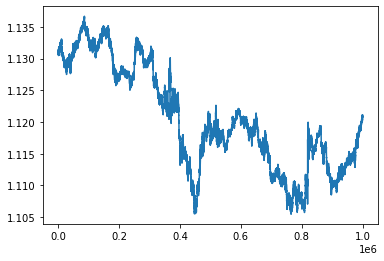

In [12]:
ticks_Bid = data_a[:, 1]  # Bid
ticks_Ask = data_a[:, 0]  # Ask
plt.plot(range(len(ticks_Bid)),ticks_Bid)

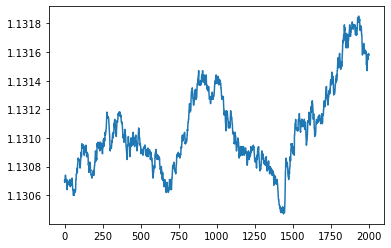

In [13]:
# Bid - the first 2000 ticks

plt.plot(range(2000), ticks_Bid[:2000])

In [14]:
step     = 1   
lookback = 200 # sliding window
delay    = 1

In [15]:
# Normalisation

mean1 = data_a[:500000].mean(axis=0)
data_a -= mean1
std1 = data_a[:500000].std(axis=0)
data_a /= std1

In [16]:
# Generater

def generator(data, 
              lookback, 
              delay, 
              min_index, 
              max_index, 
              shuffle=False, 
              batch_size=128, 
              step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [18]:

batch_size = 80

train_gen = generator(data_a,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 500000,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)

val_gen = generator(data_a,
                      lookback = lookback,
                      delay = delay,
                      min_index = 500001,
                      max_index = 800000,
                      step = step,
                      batch_size = batch_size)

test_gen = generator(data_a,
                      lookback = lookback,
                      delay = delay,
                      min_index = 800001,
                      max_index = None,
                      step = step,
                      batch_size = batch_size)


val_steps = (800000 - 500001 - lookback) // batch_size 


test_steps = (len(data_a) - 800001 - lookback) // batch_size 

## Recurrent Neural Network-1
### Gated Recurrent Unit (GRU)

In [77]:
model = keras.Sequential([

    keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, data_a.shape[-1])),
    
    keras.layers.GRU(64, activation=tf.nn.relu, dropout=0.1, recurrent_dropout=0.5),
    
    keras.layers.Dense(1)
    
])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 32)          3648      
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 22,529
Trainable params: 22,529
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")  

In [79]:
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

C:\Users\vital\anaconda3_\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 17s 26ms/step - loss: 0.1306 - val_loss: 0.0336
Epoch 2/20
500/500 [==============================] - 12s 24ms/step - loss: 0.0628 - val_loss: 0.1715
Epoch 3/20
500/500 [==============================] - 12s 25ms/step - loss: 0.0496 - val_loss: 0.1878
Epoch 4/20
500/500 [==============================] - 13s 25ms/step - loss: 0.0448 - val_loss: 0.1881
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0418 - val_loss: 0.1866
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0400 - val_loss: 0.1875
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0383 - val_loss: 0.1452
Epoch 8/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0377 - val_loss: 0.1289
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 0.0372 - val_loss: 0.1575
Epoch 10/20
500/500 [==============================] - 12s 25ms/step - loss: 0.036

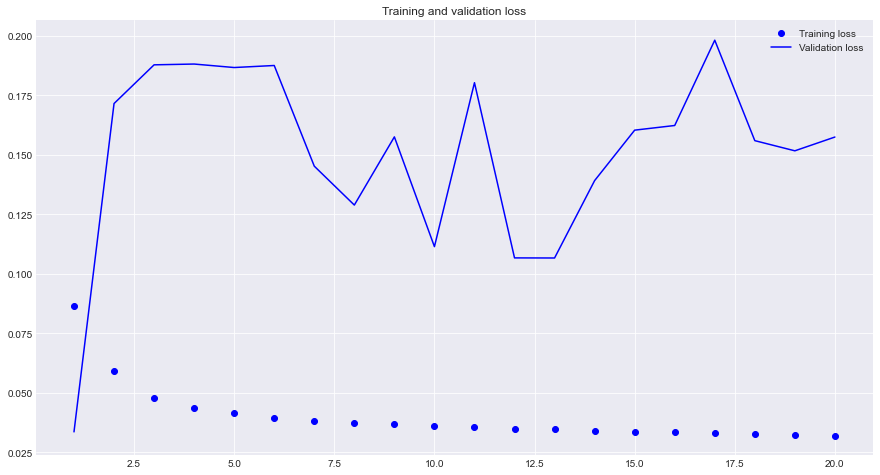

In [80]:

plt.style.use('seaborn-darkgrid') 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)
plt.figure(num=1, figsize=(15,8))

#plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Recurrent Neural Network-2
### LSTM

In [68]:

model = keras.Sequential([

    keras.layers.LSTM(32, input_shape=(None, data_a.shape[-1])),
    
    keras.layers.Dense(1)
    
])

print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 32)                4736      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")  


In [70]:
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=10, validation_data=val_gen, validation_steps=val_steps)

C:\Users\vital\anaconda3_\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 10s 16ms/step - loss: 0.1180 - val_loss: 0.0464
Epoch 2/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0303 - val_loss: 0.0238
Epoch 3/10
500/500 [==============================] - 7s 14ms/step - loss: 0.0280 - val_loss: 0.0262
Epoch 4/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0268 - val_loss: 0.0491
Epoch 5/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0255 - val_loss: 0.0221
Epoch 6/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0244 - val_loss: 0.0269
Epoch 7/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0240 - val_loss: 0.0269
Epoch 8/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0238 - val_loss: 0.0322
Epoch 9/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0234 - val_loss: 0.0208
Epoch 10/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0235 - val_l

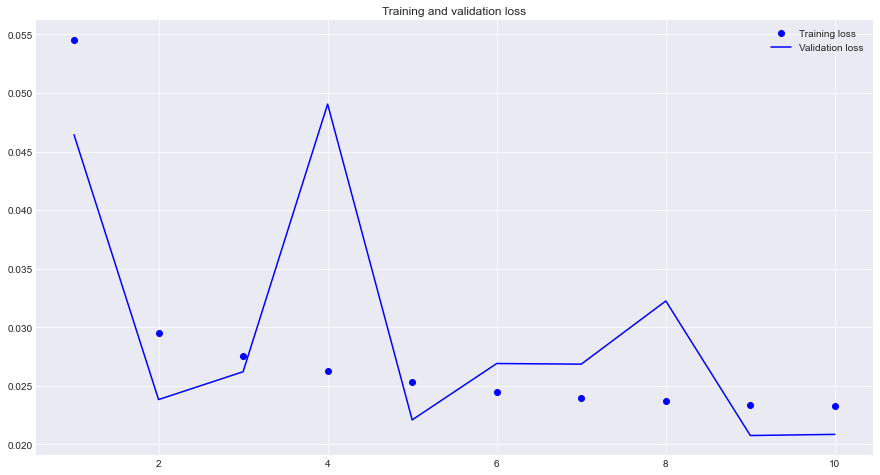

In [71]:

plt.style.use('seaborn-darkgrid') 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)
plt.figure(num=1, figsize=(15,8))


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()